# Problem Statement: 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Objective
- model the demand for shared bikes with the available independent variables.
- identify the variables are significant in predicting the demand for shared bikes.

### Steps:
- Reading and Understanding the Data
- Visualising the Data
- Data Preparation
- Splitting the Data into Training and Testing Sets
- Building a linear model
- Residual Analysis of the train data
- Making Predictions Using the Final Model

### Step 1: Reading and Understanding the Data

In [1294]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1295]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns


In [1296]:
# import dataset
df = pd.read_csv("day.csv" , low_memory=False)

In [1297]:
# Inspect head
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No missing values in the dataset. Types are also correct.

In [1299]:
df.shape

(730, 16)

In [1300]:
df.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
730      31-12-2019  1       1   12    0        1        1           2           8.849153   11.17435  57.7500  10.374682  439     2290        2729    1
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
2        02-01-2018  1       0   1     0        0        0           2           14.902598  17.68695  69.6087  16.652113  131     670         801     1
3        03-01-2018  1       0   1     0        1        1           1           8.050924   9.47025   43.7273  16.636703  120     1229        1349    1
4        04-01-2018  1       0   1     0        2        1           1           8.200000   10.60610  59.0435  10.739832  108     1454        1562    1
                                                                                             

In [1301]:
#list the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

remove columns not necessary for EDA and model building:
- `instant` - just an index column
- `dteday` - month, year, weekday already present in separate columns
- `casual` and `registered` - total bike sharing count already present, which is the target column

In [1302]:
cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
df = df.drop(columns=cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Handling outliers

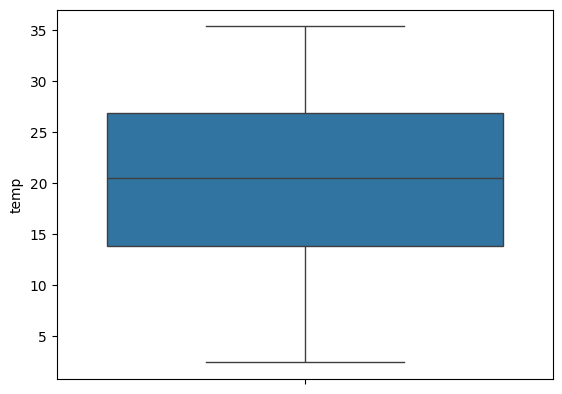

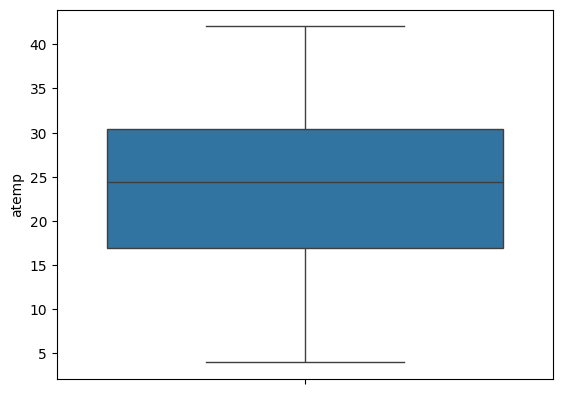

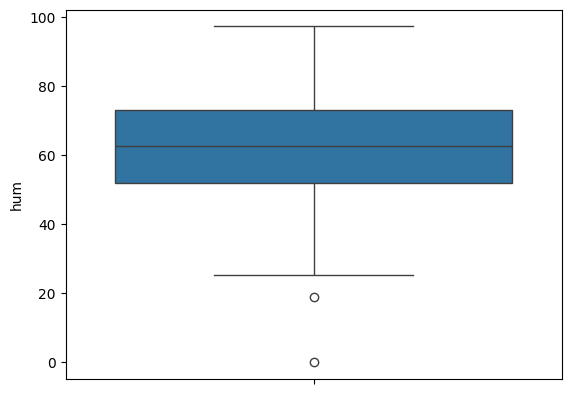

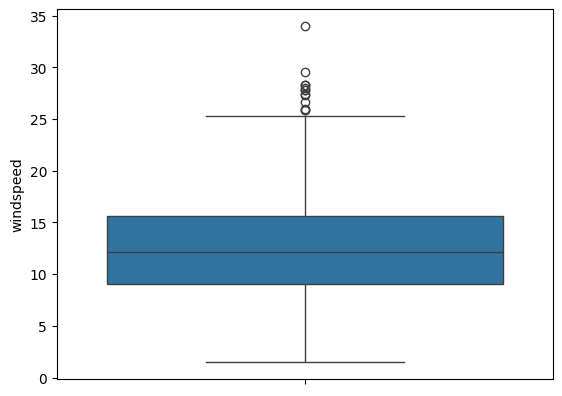

In [1303]:
# Draw boxplots for numeric continuous variables
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in num_cols:
    sns.boxplot(df, y=col)
    mlt.show()


In [1304]:
# check min, max and IQR
for col in num_cols:
    print("---------------------------------" + col.upper() + "-------------------------------")
    print(df[col].describe())

---------------------------------TEMP-------------------------------
count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64
---------------------------------ATEMP-------------------------------
count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64
---------------------------------HUM-------------------------------
count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64
---------------------------------WINDSPEED-------------------------------
count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.00002

No huge jump in values observed. Hence, no need of outlier handing

### Step 2: Visualizing the data

convert columns to categorical string values

In [1305]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1306]:
df['weathersit_cat'] = df['weathersit'].map({1: "sunny", 2: "cloudy", 3: "rainy", 4: "stormy"}).astype('object')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_cat
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,cloudy
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,cloudy
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,sunny
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,sunny
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,sunny


In [1307]:
# convert months
df['mnth_cat'] = df['mnth'].map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}).astype('object')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_cat,mnth_cat
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,cloudy,Jan
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,cloudy,Jan
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,sunny,Jan
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,sunny,Jan
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,sunny,Jan


In [1308]:
# convert yr, Holiday, Weekday, Workingday, season
df['yr_cat'] = df['yr'].map({0: '2018', 1:'2019'}).astype('object')
df['weekday_cat'] = df['weekday'].map({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}).astype('object')
df['holiday_cat'] = df['holiday'].map({0: 'Yes',1: 'No'}).astype('object')
df['workingday_cat'] = df['workingday'].map({0: 'Working',1: 'NotWorking'}).astype('object')
df['season_cat'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}).astype('object')

df.head()




,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weathersit_cat,mnth_cat,yr_cat,weekday_cat,holiday_cat,workingday_cat,season_cat
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,cloudy,Jan,2018,Sat,Yes,Working,spring
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,cloudy,Jan,2018,Sun,Yes,Working,spring
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,sunny,Jan,2018,Mon,Yes,NotWorking,spring
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,sunny,Jan,2018,Tue,Yes,NotWorking,spring
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,sunny,Jan,2018,Wed,Yes,NotWorking,spring


#### EDA

Plot `cnt` against categorical columns

In [1309]:
cat_columns = ['season_cat', 'weathersit_cat', 'mnth_cat', 'yr_cat', 'weekday_cat', 'holiday_cat', 'workingday_cat']
for col in cat_columns:
    print("--------------------------- " + col + " -----------------------------------")
    print(df[col].value_counts())

--------------------------- season_cat -----------------------------------
season_cat
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64
--------------------------- weathersit_cat -----------------------------------
weathersit_cat
sunny     463
cloudy    246
rainy      21
Name: count, dtype: int64
--------------------------- mnth_cat -----------------------------------
mnth_cat
Jan     62
Mar     62
Jul     62
May     62
Dec     62
Oct     62
Aug     62
Apr     60
Sept    60
Jun     60
Nov     60
Feb     56
Name: count, dtype: int64
--------------------------- yr_cat -----------------------------------
yr_cat
2018    365
2019    365
Name: count, dtype: int64
--------------------------- weekday_cat -----------------------------------
weekday_cat
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64
--------------------------- holiday_cat -----------------------------------
holiday_cat
Yes    709
No      21
N

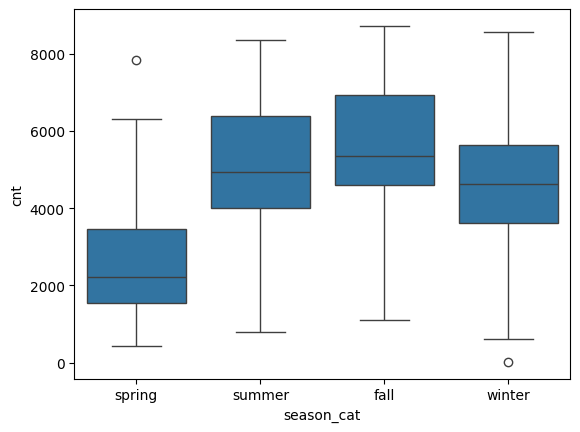

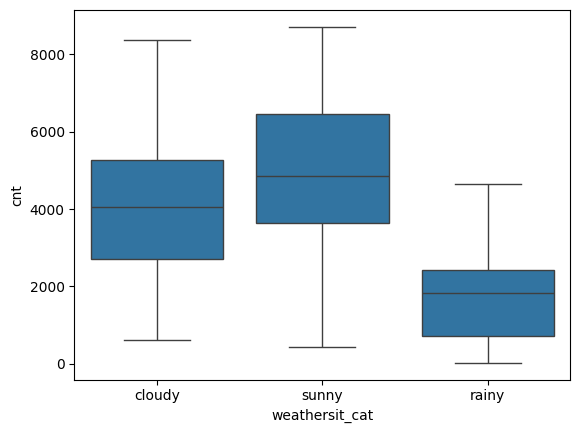

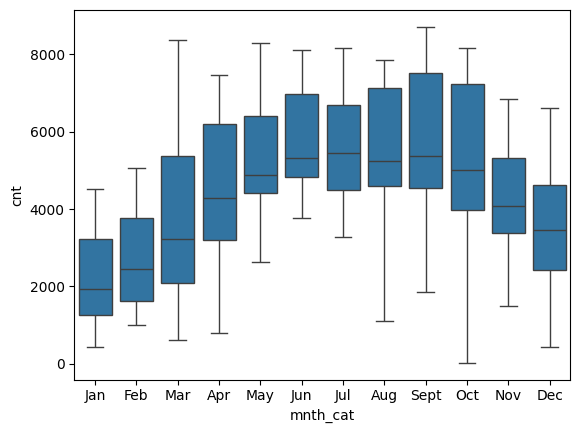

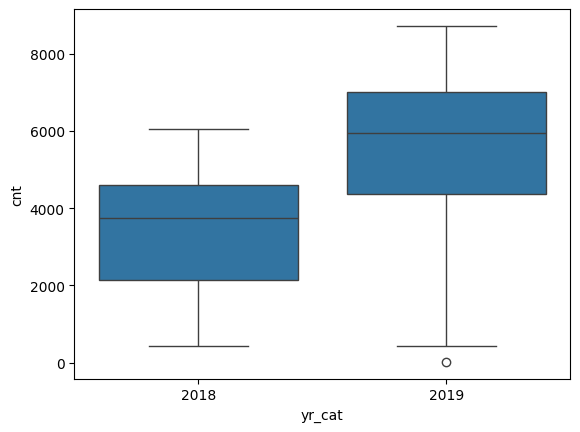

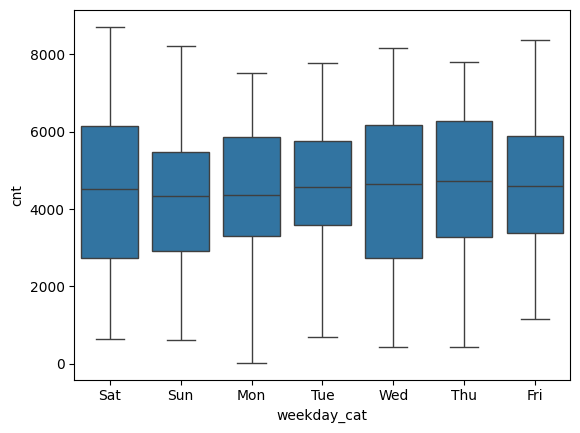

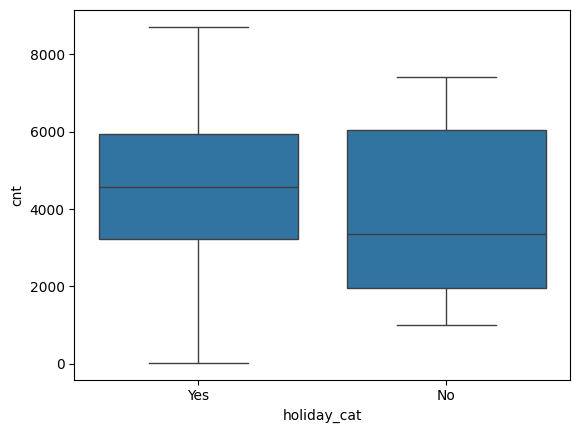

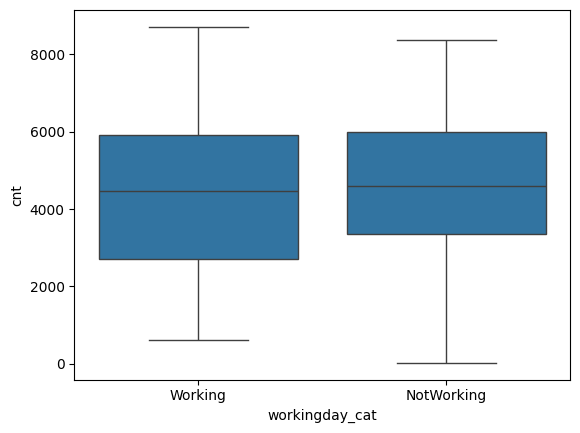

In [1310]:
for col in cat_columns:
    sns.boxplot(df, x=col, y='cnt')
    mlt.show()

- Bike demand is highest in fall ( season 3 )
- Bike demand is highest in sunny weather ( weathersit 1: Clear, Few clouds, Partly cloudy, Partly cloudy). Stormy (weathersit 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) has no bike demand at all.
- Bike demand rises from Feb to June.
- Bike demand has grown in next year 
- Demand decreases on holidays
- More demand on working days

Correlation among numerical continuous columns

In [1311]:
df.dtypes

season              int64
yr                  int64
mnth                int64
holiday             int64
weekday             int64
workingday          int64
weathersit          int64
temp              float64
atemp             float64
hum               float64
windspeed         float64
cnt                 int64
weathersit_cat     object
mnth_cat           object
yr_cat             object
weekday_cat        object
holiday_cat        object
workingday_cat     object
season_cat         object
dtype: object

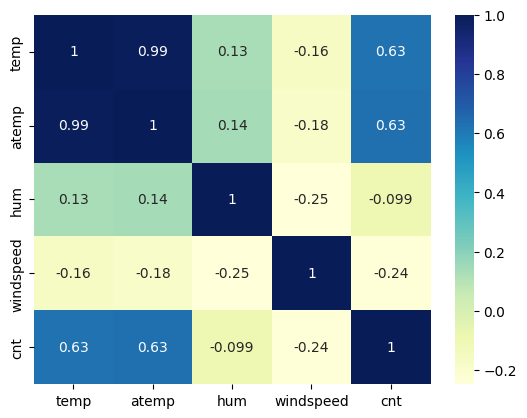

In [1312]:
corr_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.heatmap(data=df[corr_cols].corr(), cmap="YlGnBu", annot = True)
mlt.show()

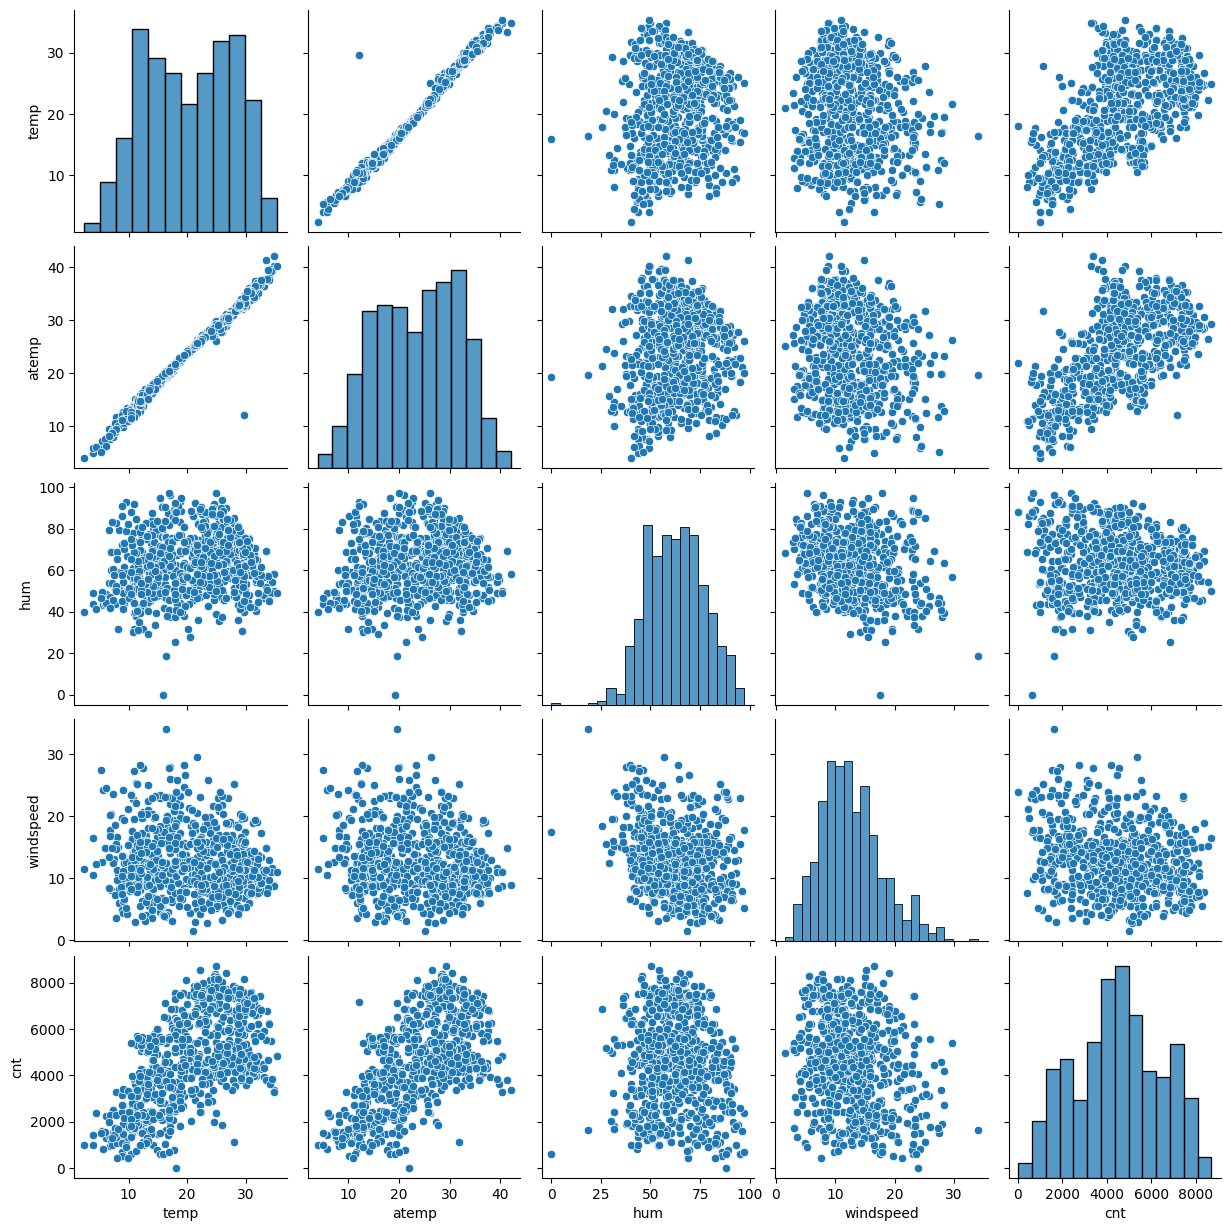

In [1313]:
sns.pairplot(df, vars=corr_cols)
mlt.show()

- `temp` and `atemp` have strong positive correlation with `cnt`
- `temp` and `atemp` have high correlation between them (multicolinearity)

### Step 3: Data preparation

create dummy values for categorical columns having more than 2 levels

In [1314]:
level_cols = ['season_cat', 'weekday_cat', 'weathersit_cat', 'mnth_cat']
df = pd.get_dummies(data=df, columns=level_cols, drop_first=True, dtype=int)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_cat_Dec,mnth_cat_Feb,mnth_cat_Jan,mnth_cat_Jul,mnth_cat_Jun,mnth_cat_Mar,mnth_cat_May,mnth_cat_Nov,mnth_cat_Oct,mnth_cat_Sept
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [1315]:
# check shape 
df.shape

(730, 37)

In [1316]:
# import relevant libs

import sklearn
from sklearn.model_selection import train_test_split

In [1317]:
#target variable on y-axis
y=df.pop('cnt')

#other variables on x-axis
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [1318]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 36)
(219, 36)


remove categorical columns created for EDA from the training set

In [1319]:
cols_remove_from_training_set = ['yr_cat', 'holiday_cat', 'workingday_cat']


In [1320]:
X_train = X_train.drop(columns=cols_remove_from_training_set)
X_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'season_cat_spring',
       'season_cat_summer', 'season_cat_winter', 'weekday_cat_Mon',
       'weekday_cat_Sat', 'weekday_cat_Sun', 'weekday_cat_Thu',
       'weekday_cat_Tue', 'weekday_cat_Wed', 'weathersit_cat_rainy',
       'weathersit_cat_sunny', 'mnth_cat_Aug', 'mnth_cat_Dec', 'mnth_cat_Feb',
       'mnth_cat_Jan', 'mnth_cat_Jul', 'mnth_cat_Jun', 'mnth_cat_Mar',
       'mnth_cat_May', 'mnth_cat_Nov', 'mnth_cat_Oct', 'mnth_cat_Sept'],
      dtype='object')

Rescaling the Features
- temp
- atemp
- hum
- windspeed

In [1321]:
# Importing required library
from sklearn.preprocessing import MinMaxScaler

In [1322]:
scaler = MinMaxScaler()
scale_vars = ['temp', 'atemp', 'hum', 'windspeed']
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_train.describe()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_cat_Dec,mnth_cat_Feb,mnth_cat_Jan,mnth_cat_Jul,mnth_cat_Jun,mnth_cat_Mar,mnth_cat_May,mnth_cat_Nov,mnth_cat_Oct,mnth_cat_Sept
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000
mean,2.463796,0.499022,6.522505,0.033268,3.058708,0.669276,1.383562,0.538445,0.538479,0.640717,...,0.097847,0.076321,0.088063,0.080235,0.091977,0.09002,0.076321,0.078278,0.072407,0.082192
std,1.110626,0.500489,3.490461,0.179512,2.013795,0.470935,0.550974,0.228884,0.223866,0.147910,...,0.297399,0.265771,0.283664,0.271923,0.289276,0.28649,0.265771,0.268872,0.259415,0.274926
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.334921,0.341587,0.533382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.529616,0.542503,0.631534,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.741444,0.728677,0.741431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### Step 5: Building a linear model

Recursive Feature Elimination

In [1323]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1324]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_cat_Dec,mnth_cat_Feb,mnth_cat_Jan,mnth_cat_Jul,mnth_cat_Jun,mnth_cat_Mar,mnth_cat_May,mnth_cat_Nov,mnth_cat_Oct,mnth_cat_Sept
430,1,1,3,0,3,1,1,0.429933,0.421620,0.527849,...,0,0,0,0,0,1,0,0,0,0
692,4,1,11,0,6,0,1,0.273137,0.233759,0.416024,...,0,0,0,0,0,0,0,1,0,0
127,2,0,5,0,0,0,1,0.584649,0.606003,0.649529,...,0,0,0,0,0,0,1,0,0,0
133,2,0,5,0,6,0,2,0.575304,0.580786,0.948586,...,0,0,0,0,0,0,1,0,0,0
524,2,1,6,0,6,0,1,0.812053,0.784325,0.449443,...,0,0,0,0,1,0,0,0,0,0


In [1325]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1326]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('mnth', np.False_, np.int64(19)),
 ('holiday', np.True_, np.int64(1)),
 ('weekday', np.False_, np.int64(13)),
 ('workingday', np.False_, np.int64(6)),
 ('weathersit', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_cat_spring', np.True_, np.int64(1)),
 ('season_cat_summer', np.True_, np.int64(1)),
 ('season_cat_winter', np.True_, np.int64(1)),
 ('weekday_cat_Mon', np.False_, np.int64(7)),
 ('weekday_cat_Sat', np.False_, np.int64(15)),
 ('weekday_cat_Sun', np.False_, np.int64(17)),
 ('weekday_cat_Thu', np.False_, np.int64(16)),
 ('weekday_cat_Tue', np.False_, np.int64(14)),
 ('weekday_cat_Wed', np.False_, np.int64(18)),
 ('weathersit_cat_rainy', np.True_, np.int64(1)),
 ('weathersit_cat_sunny', np.True_, np.int64(1)),
 ('mnth_cat_Aug', np.False_, np.int64(9)),
 ('mnth_cat_Dec', np.False_, np.i

In [1327]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'holiday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'season_cat_spring', 'season_cat_summer',
       'season_cat_winter', 'weathersit_cat_rainy', 'weathersit_cat_sunny',
       'mnth_cat_Jul', 'mnth_cat_Sept'],
      dtype='object')

In [1328]:
X_train.columns[~rfe.support_]


Index(['mnth', 'weekday', 'workingday', 'weekday_cat_Mon', 'weekday_cat_Sat',
       'weekday_cat_Sun', 'weekday_cat_Thu', 'weekday_cat_Tue',
       'weekday_cat_Wed', 'mnth_cat_Aug', 'mnth_cat_Dec', 'mnth_cat_Feb',
       'mnth_cat_Jan', 'mnth_cat_Jun', 'mnth_cat_Mar', 'mnth_cat_May',
       'mnth_cat_Nov', 'mnth_cat_Oct'],
      dtype='object')

Build a model

In [1329]:
import statsmodels.api as sm

In [1330]:
X_train_sm = sm.add_constant(X_train[col]) #with columns selected by RFE
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.38e-185
Time:                        11:35:42   Log-Likelihood:                -4141.8
No. Observations:                 511   AIC:                             8312.
Df Residuals:                     497   BIC:                             8371.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  762.1246     78.107      9.757      0.000     608.665     915.584
season                 573.2430     65.009      8.818      0.000     445.517     700.969
yr                    1945.8040     73.211     26.578      0.000    1801.964    2089.644
holiday               -635.5641    201.379     -3.156      0.002   -1031.223    -239.905
weathersit            -146.4355     87.012     -1.683      0.093    -317.391      24.520
temp                  3452.7773   1197.563      2.883      0.004    1099.867    5805.687
atemp                  978.3931   1182.708      0.827      0.408   -1345.330    3302.116
hum                  -1492.4768    334.314     -4.464      0.000   -2149.319    -835.634
windspeed            -1273.3774    248.687     -5.120      0.000   -1761.984    -784.770
season_cat_spring      428.9694     98.874      4.339      0.000     234.706     623.233
season_cat_summer      944.7800    103.316      9.145      0.000     741.790    1147.770
season_cat_winter       89.5881    202.167      0.443      0.658    -307.619     486.795
weathersit_cat_rainy -1370.2918    178.778     -7.665      0.000   -1721.546   -1019.037
weathersit_cat_sunny   300.3929     87.136      3.447      0.001     129.193     471.593
mnth_cat_Jul          -477.1330    164.787     -2.895      0.004    -800.898    -153.368
mnth_cat_Sept          696.3297    147.470      4.722      0.000     406.588     986.071
==============================================================================
Omnibus:                       69.647   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.925
Skew:                          -0.798   Prob(JB):                     3.72e-29
Kurtosis:                       4.899   Cond. No.                     2.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

as per above model:
- around 83% of data variance is explained by the model, which is good.
- F-statsitic probablity is also low, which is good.
- predictors `weathersit`, `atemp`, `season_cat_winter` have p-value greater then 0.05, so these predictors may be dropped.

Next step is to calculate VIF to determine multicolinearity of these columns.

VIF calculation

In [1331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1332]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,inf
3,weathersit,inf
12,weathersit_cat_sunny,inf
11,weathersit_cat_rainy,inf
10,season_cat_winter,inf
9,season_cat_summer,inf
8,season_cat_spring,inf
4,temp,58.03
5,atemp,54.15
6,hum,1.89


Few columns show perfiect colinearity. This is not good for the model.
We should now remove these columns one by one and see if VIF values change. 

Removing `season` predictor first and building another model
`atemp` predictor has high p-value as well as high VIF, so droppinh `atemp` also

In [1333]:
col = ['yr', 'holiday', 'weathersit', 'temp', 'hum',
       'windspeed', 'season_cat_spring', 'season_cat_summer',
       'season_cat_winter', 'weathersit_cat_rainy', 'weathersit_cat_sunny',
       'mnth_cat_Jul', 'mnth_cat_Sept']

In [1334]:
X_train_sm = sm.add_constant(X_train[col])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.30e-186
Time:                        11:35:42   Log-Likelihood:                -4142.1
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     498   BIC:                             8365.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1499.9925    145.898     10.281      0.000    1213.341    1786.644
yr                    1946.0990     73.186     26.591      0.000    1802.307    2089.891
holiday               -640.4085    201.230     -3.182      0.002   -1035.773    -245.044
weathersit             341.2419    115.275      2.960      0.003     114.756     567.728
temp                  4413.4900    292.240     15.102      0.000    3839.315    4987.665
hum                  -1476.5750    333.655     -4.425      0.000   -2132.120    -821.030
windspeed            -1309.8064    244.679     -5.353      0.000   -1790.537    -829.075
season_cat_spring     -698.9963    182.606     -3.828      0.000   -1057.769    -340.224
season_cat_summer      391.7809    132.185      2.964      0.003     132.071     651.490
season_cat_winter      685.7320    152.426      4.499      0.000     386.254     985.210
weathersit_cat_rainy -1866.8381    207.571     -8.994      0.000   -2274.661   -1459.015
weathersit_cat_sunny   791.9050    104.480      7.579      0.000     586.628     997.182
mnth_cat_Jul          -469.0132    164.442     -2.852      0.005    -792.099    -145.927
mnth_cat_Sept          700.7529    147.326      4.756      0.000     411.295     990.210
==============================================================================
Omnibus:                       68.850   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.829
Skew:                          -0.791   Prob(JB):                     1.06e-28
Kurtosis:                       4.883   Cond. No.                     2.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.74e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1335]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weathersit,53.56
10,weathersit_cat_sunny,12.04
6,season_cat_spring,4.95
3,temp,3.46
8,season_cat_winter,3.21
7,season_cat_summer,2.55
4,hum,1.88
9,weathersit_cat_rainy,1.82
11,mnth_cat_Jul,1.55
12,mnth_cat_Sept,1.27


- around 83% of data variance is explained
- prob F-squared is also low
Except `weathersit` and `weathersit_cat_sunny`, all predictors have VIF less than 5. So we can keep them for the model

Dropping `weathersit` can analysing another model

In [1336]:
col = ['yr', 'holiday', 'temp', 'hum',
       'windspeed', 'season_cat_spring', 'season_cat_summer',
       'season_cat_winter', 'weathersit_cat_rainy', 'weathersit_cat_sunny',
       'mnth_cat_Jul', 'mnth_cat_Sept']

In [1337]:
X_train_sm = sm.add_constant(X_train[col])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.30e-186
Time:                        11:35:42   Log-Likelihood:                -4142.1
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     498   BIC:                             8365.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2182.4762    353.243      6.178      0.000    1488.447    2876.506
yr                    1946.0990     73.186     26.591      0.000    1802.307    2089.891
holiday               -640.4085    201.230     -3.182      0.002   -1035.773    -245.044
temp                  4413.4900    292.240     15.102      0.000    3839.315    4987.665
hum                  -1476.5750    333.655     -4.425      0.000   -2132.120    -821.030
windspeed            -1309.8064    244.679     -5.353      0.000   -1790.537    -829.075
season_cat_spring     -698.9963    182.606     -3.828      0.000   -1057.769    -340.224
season_cat_summer      391.7809    132.185      2.964      0.003     132.071     651.490
season_cat_winter      685.7320    152.426      4.499      0.000     386.254     985.210
weathersit_cat_rainy -1525.5962    217.792     -7.005      0.000   -1953.500   -1097.692
weathersit_cat_sunny   450.6632     96.859      4.653      0.000     260.360     640.966
mnth_cat_Jul          -469.0132    164.442     -2.852      0.005    -792.099    -145.927
mnth_cat_Sept          700.7529    147.326      4.756      0.000     411.295     990.210
==============================================================================
Omnibus:                       68.850   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.829
Skew:                          -0.791   Prob(JB):                     1.06e-28
Kurtosis:                       4.883   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1338]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.91
2,temp,17.35
4,windspeed,5.56
5,season_cat_spring,4.58
9,weathersit_cat_sunny,3.60
7,season_cat_winter,3.29
6,season_cat_summer,2.87
0,yr,2.04
10,mnth_cat_Jul,1.65
11,mnth_cat_Sept,1.37


model parameters nearly same as previous models

removing `hum` and analysing another model

In [1339]:
col = ['yr', 'holiday', 'temp',
       'windspeed', 'season_cat_spring', 'season_cat_summer',
       'season_cat_winter', 'weathersit_cat_rainy', 'weathersit_cat_sunny',
       'mnth_cat_Jul', 'mnth_cat_Sept']

In [1340]:
X_train_sm = sm.add_constant(X_train[col])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.6
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.22e-183
Time:                        11:35:42   Log-Likelihood:                -4152.0
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1115.3834    262.908      4.242      0.000     598.841    1631.925
yr                    1980.4775     74.116     26.721      0.000    1834.860    2126.095
holiday               -666.2371    204.857     -3.252      0.001   -1068.726    -263.749
temp                  4182.0558    292.828     14.282      0.000    3606.729    4757.383
windspeed             -988.1339    237.944     -4.153      0.000   -1455.630    -520.638
season_cat_spring     -738.8433    185.749     -3.978      0.000   -1103.789    -373.897
season_cat_summer      369.7870    134.529      2.749      0.006     105.474     634.100
season_cat_winter      601.7911    154.032      3.907      0.000     299.160     904.422
weathersit_cat_rainy -1738.7831    216.317     -8.038      0.000   -2163.787   -1313.780
weathersit_cat_sunny   698.2605     80.525      8.671      0.000     540.051     856.470
mnth_cat_Jul          -407.3467    166.874     -2.441      0.015    -735.209     -79.484
mnth_cat_Sept          641.8955    149.432      4.296      0.000     348.302     935.489
==============================================================================
Omnibus:                       65.916   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.283
Skew:                          -0.765   Prob(JB):                     2.80e-27
Kurtosis:                       4.845   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1341]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.37
3,windspeed,5.56
8,weathersit_cat_sunny,3.07
5,season_cat_summer,2.25
4,season_cat_spring,2.25
0,yr,2.04
6,season_cat_winter,1.76
9,mnth_cat_Jul,1.65
10,mnth_cat_Sept,1.32
7,weathersit_cat_rainy,1.16


removing `windspeed` and analysing another model

In [1342]:
col = ['yr', 'holiday', 'temp', 'season_cat_spring', 'season_cat_summer',
       'season_cat_winter', 'weathersit_cat_rainy', 'weathersit_cat_sunny',
       'mnth_cat_Jul', 'mnth_cat_Sept']

In [1343]:
X_train_sm = sm.add_constant(X_train[col])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          3.63e-181
Time:                        11:35:42   Log-Likelihood:                -4160.7
No. Observations:                 511   AIC:                             8343.
Df Residuals:                     500   BIC:                             8390.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  784.9002    254.612      3.083      0.002     284.659    1285.142
yr                    1981.8857     75.309     26.317      0.000    1833.924    2129.848
holiday               -666.2258    208.158     -3.201      0.001   -1075.199    -257.253
temp                  4228.3192    297.331     14.221      0.000    3644.146    4812.492
season_cat_spring     -793.3493    188.270     -4.214      0.000   -1163.248    -423.451
season_cat_summer      319.4935    136.142      2.347      0.019      52.012     586.975
season_cat_winter      619.3459    156.455      3.959      0.000     311.955     926.737
weathersit_cat_rainy -1901.8278    216.152     -8.799      0.000   -2326.506   -1477.150
weathersit_cat_sunny   680.0046     81.701      8.323      0.000     519.486     840.524
mnth_cat_Jul          -380.8495    169.439     -2.248      0.025    -713.751     -47.949
mnth_cat_Sept          668.4905    151.701      4.407      0.000     370.441     966.540
==============================================================================
Omnibus:                       67.109   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.258
Skew:                          -0.757   Prob(JB):                     3.15e-29
Kurtosis:                       4.967   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1344]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.24
7,weathersit_cat_sunny,3.03
0,yr,2.04
4,season_cat_summer,1.99
8,mnth_cat_Jul,1.65
5,season_cat_winter,1.58
3,season_cat_spring,1.51
9,mnth_cat_Sept,1.32
6,weathersit_cat_rainy,1.10
1,holiday,1.04


removing `season_cat_summer` from the model

In [1345]:
col = ['yr', 'holiday', 'temp', 'season_cat_spring',
       'season_cat_winter', 'weathersit_cat_rainy', 'weathersit_cat_sunny',
       'mnth_cat_Jul', 'mnth_cat_Sept']

In [1346]:
X_train_sm_final = sm.add_constant(X_train[col])
lm_final = sm.OLS(y_train, X_train_sm_final).fit()
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          3.38e-181
Time:                        11:35:42   Log-Likelihood:                -4163.5
No. Observations:                 511   AIC:                             8347.
Df Residuals:                     501   BIC:                             8389.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1169.0047    195.909      5.967      0.000     784.100    1553.909
yr                    1980.4814     75.645     26.181      0.000    1831.861    2129.102
holiday               -655.5199    209.042     -3.136      0.002   -1066.228    -244.812
temp                  3969.1276    277.296     14.314      0.000    3424.321    4513.934
season_cat_spring    -1096.2973    137.659     -7.964      0.000   -1366.758    -825.837
season_cat_winter      368.0708    114.590      3.212      0.001     142.936     593.206
weathersit_cat_rainy -1914.0713    217.059     -8.818      0.000   -2340.529   -1487.613
weathersit_cat_sunny   675.0045     82.040      8.228      0.000     513.821     836.188
mnth_cat_Jul          -536.0511    156.700     -3.421      0.001    -843.921    -228.181
mnth_cat_Sept          538.7542    141.903      3.797      0.000     259.956     817.552
==============================================================================
Omnibus:                       69.414   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.802
Skew:                          -0.770   Prob(JB):                     4.39e-31
Kurtosis:                       5.048   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1347]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.90
6,weathersit_cat_sunny,2.99
0,yr,2.04
4,season_cat_winter,1.35
3,season_cat_spring,1.35
7,mnth_cat_Jul,1.34
8,mnth_cat_Sept,1.18
5,weathersit_cat_rainy,1.10
1,holiday,1.04


### Step 6: Residual Analysis of the train data


Checking if the error terms are also normally distributed.

Text(0.5, 0, 'Errors')

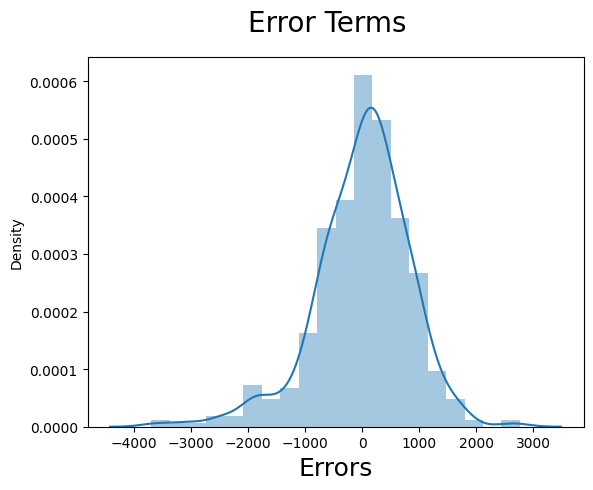

In [1348]:
y_train_pred = lm_final.predict(X_train_sm_final)
fig = mlt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
mlt.xlabel('Errors', fontsize = 18)


As per above graph, the error terms are approximately normally distributed with mean around 0

In [1349]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)


0.8215870060680452

- R2 score is around 82% which means nearly 82% of data variance is explained by the model
- Error terms are normally distributed with mean centered around 0

Conclusion: Model is fit for making predictions

### Step 7: Making Predictions Using the Final Model

Applying the scaling on the test sets


In [1350]:
# Applying the scaling on the test sets
X_test[scale_vars] = scaler.transform(X_test[scale_vars])


In [1351]:
X_test_final = X_test.loc[:, col]
X_test_final = sm.add_constant(X_test_final)
y_pred = lm_final.predict(X_test_final)


R2 value for test predictions

In [1352]:
r2_score(y_test,y_pred)

0.807196632022457

R2 value on test data 0.807 is almost same to the R2 value 0.821. This is a good R-squared value, hence we can say our model is performing good on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

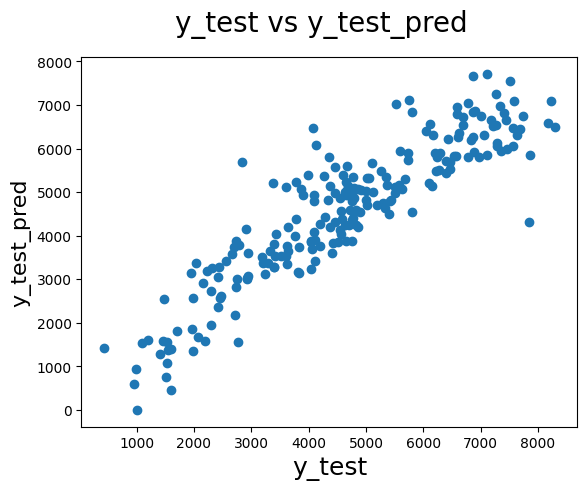

In [1353]:
fig = mlt.figure()
mlt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
mlt.xlabel('y_test', fontsize = 18)
mlt.ylabel('y_test_pred', fontsize = 16)

plot error terms of test data

Text(0.5, 0, 'Errors')

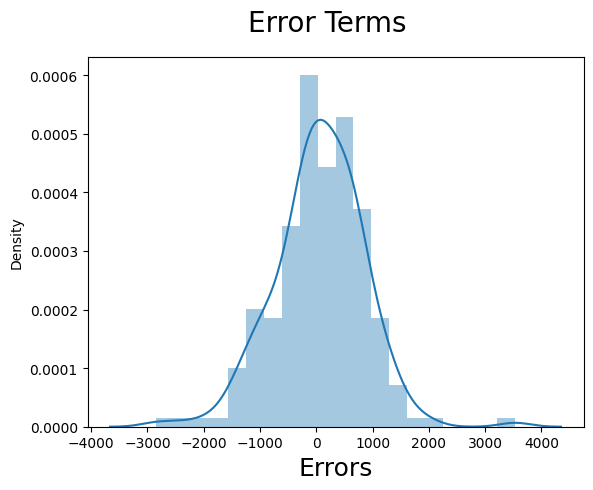

In [1354]:
fig = mlt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
mlt.xlabel('Errors', fontsize = 18)

Error terms are normally distributed with mean around 0.

Text(0, 0.5, 'Counts - Predicted Counts')

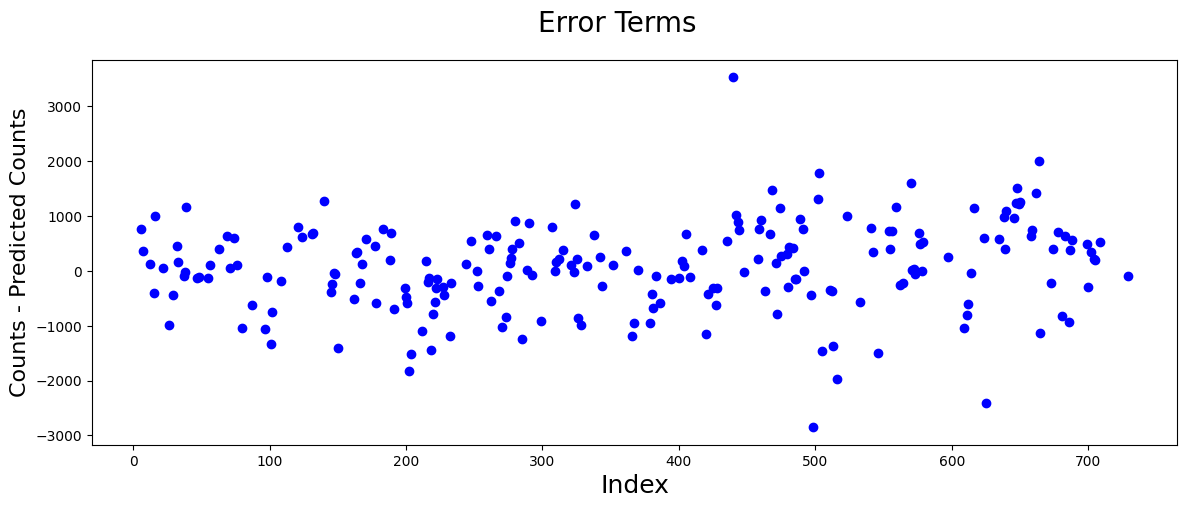

In [1355]:
fig = mlt.figure(figsize=(14,5))
mlt.plot(y_test - y_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
mlt.xlabel('Index', fontsize=18)                      # X-label
mlt.ylabel('Counts - Predicted Counts', fontsize=16)   

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model.



### Interepretation of results
As per the above model, the comapany should work on expanding the business :
- During fall season.
- In sunny weather ( weathersit 1: Clear, Few clouds, Partly cloudy, Partly cloudy). 
- In months Feb to June.
- On working days

The business has expanded in 2019, so is likely to expand in coming years too.

### Conclusion
Significant variables to predict the demand for shared bikes

- Year
- holiday
- temp
- Season
- months
- weathersit